# Machine Learning Animes Analysis Project

### Author: Wuyang Dai, Zhucheng Pan, Yiran Shen, Ruixin Zhang

Original Dataset Source: SAJID. (2023). Anime Dataset 2023. Kaggle. https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?resource=download&select=anime-dataset-2023.csv


Modified Dataset: https://raw.githubusercontent.com/Threegoldsqwq/Machine_Learning_Animes_Analysis/main/anime-dataset-2023.csv

# Anime Dataset 2023 Description

**Attributes for Anime Dataset 2023:**

1. anime_id: Unique ID for each anime.

2. Name: The name of the anime in its original language.

3. English name: The English name of the anime.

4. Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).

5. Score: The score or rating given to the anime.

6. Genres: The genres of the anime, separated by commas.

7. Synopsis: A brief description or summary of the anime's plot.

8. Type: The type of the anime (e.g., TV series, movie, OVA, etc.).

9. Episodes: The number of episodes in the anime.

10. Aired: The dates when the anime was aired.

11. Premiered: The season and year when the anime premiered.

12. Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).

13. Producers: The production companies or producers of the anime.

14. Licensors: The licensors of the anime (e.g., streaming platforms).

15. Studios: The animation studios that worked on the anime.

16. Source: The source material of the anime (e.g., manga, light novel, original).

17. Duration: The duration of each episode.

18. Rating: The age rating of the anime.

19. Rank: The rank of the anime based on popularity or other criteria.

20. Popularity: The popularity rank of the anime.

21. Favorites: The number of times the anime was marked as a favorite by users.

22. Scored By: The number of users who scored the anime.

23. Members: The number of members who have added the anime to their list on the platform.

24. Image URL: The URL of the anime's image or poster.

**Missing values:**
- English name: 14577
- Other name:128
- Score: 9213
- Genres: 4929
- Type: 74
- Episodes: 611
- Premiered: 19399
- Producers: 13350
- Licensors: 20170
- Studios: 10526
- Source:3689
- Duration: 663
- Rating: 669
- Rank: 4612
- Scored By: 9213


# 1- Look at the big picture

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a numerical data (score of anime).
3. Batch learning 
   - Small data set (after clean up)
   - No continuous flow of data coming into the system
   - No need to adjust to changing data rapidly

### Look at the big picture
Task: Using anime data to predict popular anime genres in the future.

The result will help anime producers to decide which kind of anime should they make or which novel/manga should be animated

In [4]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

In [5]:
# Load the dataset from github
url = "https://raw.githubusercontent.com/Threegoldsqwq/Machine_Learning_Animes_Analysis/main/anime-dataset-2023.csv"
animes = pd.read_csv(url, sep=',')

# create a backup copy of the dataset
animes_backup = animes

### 2.1 Take a quick look at the data structure

We will first replace "UNKNOWN" variables to NaN and drop the "anime_id" column to make our life easier

(//delete later, for convenient)
https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

https://sentry.io/answers/change-a-column-type-in-a-dataframe-in-python-pandas/

In [6]:
# Replace "UNKNOWN" (as well as "Unknown") labels to NaN
animes = animes.replace('UNKNOWN', np.nan)
animes = animes.replace('Unknown', np.nan)
# FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead. with pd.option_context('mode.use_inf_as_na', True)
pd.option_context('mode.use_inf_as_na', True)

In [7]:
# drop the id column
# do not rerun this code unless you rerun the whole thing
animes.drop(labels=['anime_id'], axis=1, inplace=True)

Lets take a look at the whole dataset, we can see that there is 24905 rows and 24 columns

In [8]:
animes

,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",NaN,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,Wu Nao Monu,NaN,无脑魔女,NaN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",NaN,...,NaN,Web manga,NaN,PG-13 - Teens 13 or older,NaN,24723,0,NaN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,NaN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",NaN,...,NaN,Web novel,NaN,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,Di Yi Xulie,The First Order,第一序列,NaN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",NaN,...,NaN,Web novel,NaN,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,Bokura no Saishuu Sensou,NaN,僕らの最終戦争,NaN,NaN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",NaN,...,NaN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1931/...


### Use head() to look at the first 5 rows.

In [9]:
# Look at the first 5 rows
animes.head()

,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",NaN,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### Use describe() method to see a summary of the numerical attributes.

Since some numerical attributes are declared as "object" in the original dataset, we have to change them to numbers in order to visualize them.

In [10]:
# Change 'Score', 'Episodes', 'Rank' and 'Scored By' categories to numerical value

animes[['Score', 'Episodes', 'Rank', 'Scored By']] = animes[['Score', 'Episodes', 'Rank', 'Scored By']].apply(pd.to_numeric)


From describe(), we can see that 75% of animes' score is below 7.06, which can be considered as a medium level of quailty.

Also, many animes have 13 episodes, which means they will mostly finish airing in one season (in anime industry, one season is 3 month, start from January)

It is surprising that 75% of animes are marked as favorate below (only) 18 times, it is really low for a product. However the max number of favorate is 217606 (Note: the data may not reliable since many people do not want to click favorate)

In [11]:
# Describe
animes.describe()

,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members
count,15692.000000,24294.000000,20293.000000,24905.000000,24905.000000,1.569200e+04,2.490500e+04
mean,6.380890,14.913518,9960.770167,12265.388356,432.595222,2.997438e+04,3.710496e+04
std,0.928696,48.581251,5856.990951,7187.428393,4353.181647,1.169348e+05,1.568252e+05
min,1.850000,1.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000e+00
25%,5.730000,1.000000,4885.000000,6040.000000,0.000000,3.840000e+02,2.090000e+02
50%,6.390000,2.000000,9958.000000,12265.000000,1.000000,1.760000e+03,1.056000e+03
75%,7.060000,13.000000,15032.000000,18491.000000,18.000000,1.085550e+04,9.326000e+03
max,9.100000,3057.000000,20104.000000,24723.000000,217606.000000,2.660903e+06,3.744541e+06


### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

By checking the type and non-null variables, we can see that the "Licensors" has only 4735 non-null data, and "Premiered" has 5506 non-null values. These data might be dropped later in training step.

In [12]:
# Show the info of the table
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          24905 non-null  object 
 1   English name  10328 non-null  object 
 2   Other name    24777 non-null  object 
 3   Score         15692 non-null  float64
 4   Genres        19976 non-null  object 
 5   Synopsis      24905 non-null  object 
 6   Type          24831 non-null  object 
 7   Episodes      24294 non-null  float64
 8   Aired         24905 non-null  object 
 9   Premiered     5506 non-null   object 
 10  Status        24905 non-null  object 
 11  Producers     11555 non-null  object 
 12  Licensors     4735 non-null   object 
 13  Studios       14379 non-null  object 
 14  Source        21216 non-null  object 
 15  Duration      24242 non-null  object 
 16  Rating        24236 non-null  object 
 17  Rank          20293 non-null  float64
 18  Popularity    24905 non-nu

### Use value_counts to show what categories exist and how many rows belong to each category

We can see most of the animes are in TV form (with several episodes), there are also animes that are movies.

In [13]:
# Count the type of animes, if it is a TV, movies...
animes["Type"].value_counts(False, True, False, None, False)

Type
TV         7597
Movie      4381
OVA        4076
ONA        3533
Music      2686
Special    2558
NaN          74
Name: count, dtype: int64

For genres, 4929 rows are unknown, those animes might be dropped to fit our purpose.

Beside that, most of animes are fantasy and comedy, but there are many animes with combination of genres (we will combine them later).

In [14]:
# Count the genres of animes
animes["Genres"].value_counts(False, True, False, None, False)

Genres
NaN                                              4929
Comedy                                           2279
Fantasy                                          1341
Hentai                                           1181
Drama                                             624
                                                 ... 
Avant Garde, Fantasy, Romance                       1
Action, Comedy, Romance, Supernatural, Hentai       1
Drama, Horror, Supernatural, Ecchi                  1
Adventure, Comedy, Romance, Sports                  1
Action, Adventure, Fantasy, Horror                  1
Name: count, Length: 1006, dtype: int64

We can see 9622 animes are original, which means they are not adapted from any existed stories (manga/novel etc.).

We can also see that animes that adapted from manga and game are still very popular.

In [15]:
# Count the source (where the animes are made from) of animes
animes["Source"].value_counts(False, True, False, None, False)

Source
Original        9622
Manga           4687
NaN             3689
Game            1232
Visual novel    1107
Other           1008
Light novel      968
Novel            709
Web manga        447
Music            395
4-koma manga     314
Picture book     210
Book             191
Mixed media      162
Web novel         82
Card game         68
Radio             14
Name: count, dtype: int64

# 3. Explore and visualize the data to gain insights.


### 3.1 Plot a histogram of the data using hist()

say something here

This is the detailed score distribution, we can see 6.4 is the most frequent score.

b:\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


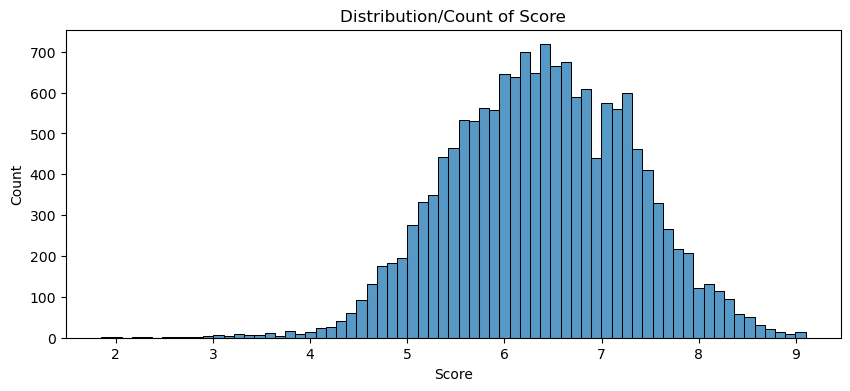

In [16]:
# visualize the count of score
plt.figure(figsize=(10, 4))
# using a histplot
sns.histplot(animes['Score'])
# title
plt.title("Distribution/Count of Score")
plt.show()

say something here

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

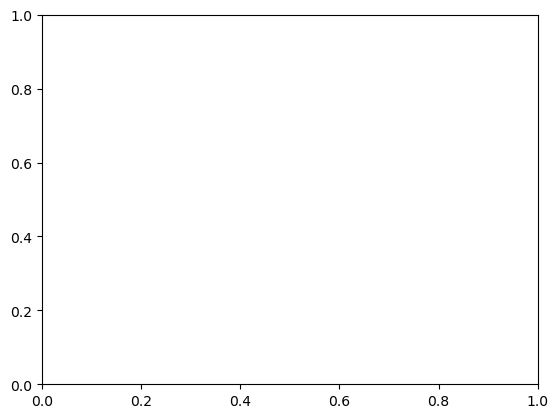

In [17]:
# get the most frequent episodes number
episodes_count = animes['Episodes'].value_counts().head(10)

# use this to get a bar plot
sns.barplot(x = episodes_count.index, y = episodes_count.values, palette="cividis", hue = episodes_count.index, legend = False)
plt.ylabel("Count")
plt.title("Distribution/Count of Episodes(top 10)")
plt.show()

Lets see the categorical data

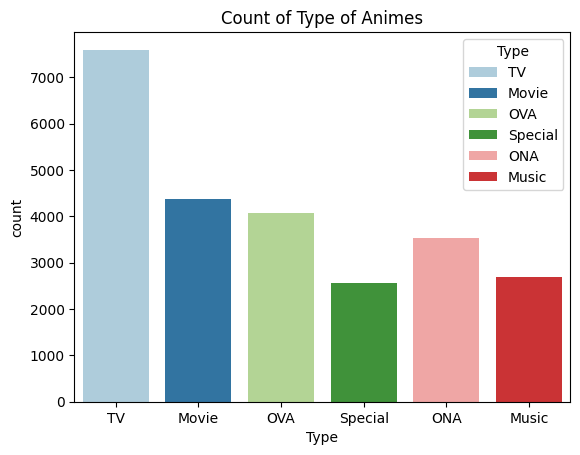

In [ ]:
# get a count plot for count of type of animes
sns.countplot(data = animes, x = "Type", hue = "Type", palette= sns.color_palette("Paired", 6))
plt.title("Count of Type of Animes")
plt.show()

say something here

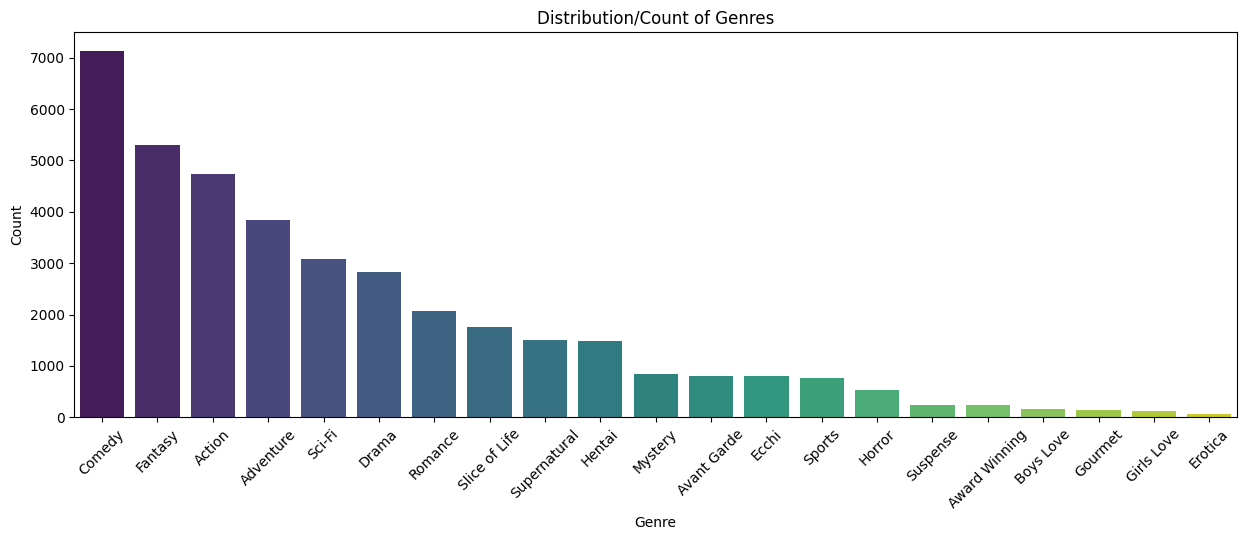

In [ ]:
# We will get the count of genres below:

# get a temporary dataframe, which is a copy of the "Genres" column of the main dataframe
temp_df = pd.DataFrame(animes['Genres'])
# fill the NaN values with space
temp_df['Genres'] = temp_df['Genres'].fillna(' ')
# split the comma and count the total number of genres appear (since we might have more genres in one anime)
genre_counts = temp_df[temp_df['Genres'] != ' ']['Genres'].apply(lambda x : x.split(', ')).explode().value_counts()

# Create diagram
plt.figure(figsize=(15,5))
sns.barplot(x = genre_counts.index, y = genre_counts.values, palette="viridis", hue = genre_counts.index)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution/Count of Genres")
plt.xticks(rotation = 45)

plt.show()

Lets take a look at the source of the anime, we can see most of the anime is original.

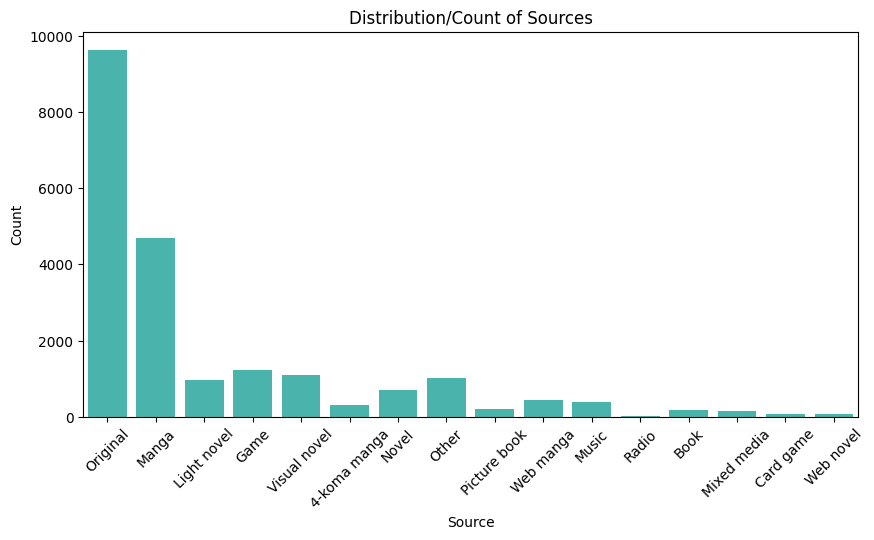

In [ ]:
# Create graph for count of sources
plt.figure(figsize=(10, 5))
sns.countplot(data = animes, x = "Source", color = "#39C5BB") # guess why I use this color here :D
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.title("Distribution/Count of Sources")
plt.show()

say something here

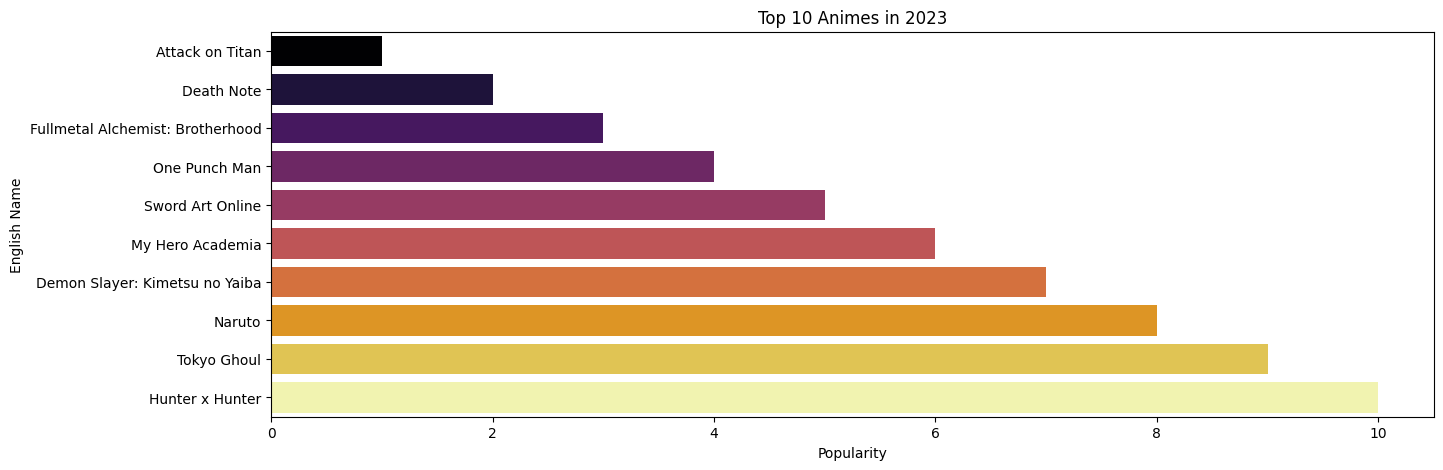

In [ ]:
# Create a diagram to show top 10 animes with their popularity (note that the lower number means it is more popularity)
plt.figure(figsize=(15, 5))
# sort the dataset to show the lowest 10 popularities, with 0.0 removed (0.0 means unknown or it is seldomly known in North America)
popularity_animes = animes[animes['Popularity'] > 0].sort_values(by='Popularity', ascending=True).head(10)
# create a bar chart
sns.barplot(data = popularity_animes, y = 'English name', x = 'Popularity', palette="inferno", hue = 'Popularity', legend = False)
plt.ylabel("English Name")
plt.xticks(rotation = 0)
plt.title("Top 10 Animes in 2023")
plt.show()

## Look for correlations between the features

### 3.2 Check for correlation between attributes using sns.pairplot.

In [ ]:
# Check for correlation between attributes using sns.pairplot.
#sns.pairplot(animes) run this later (too slow)

### 3.3 Look for correlations using pearson correlation coefficient 

Let's first see the correlations between numerical features


In [ ]:
# get the correlation matrix
corr_matrix = animes.corr(numeric_only=True)
corr_matrix

,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members
Score,1.000000,0.079212,-0.976923,-0.698047,0.235454,0.351082,0.390922
Episodes,0.079212,1.000000,0.063549,0.091301,0.044784,0.053579,0.026918
Rank,-0.976923,0.063549,1.000000,0.871935,-0.168713,-0.335063,-0.340236
Popularity,-0.698047,0.091301,0.871935,1.000000,-0.163173,-0.377240,-0.363865
Favorites,0.235454,0.044784,-0.168713,-0.163173,1.000000,0.785326,0.773120
Scored By,0.351082,0.053579,-0.335063,-0.377240,0.785326,1.000000,0.989130
Members,0.390922,0.026918,-0.340236,-0.363865,0.773120,0.989130,1.000000


#### Let's look at correlations with regard to our target

In [ ]:
corr_matrix["Score"].sort_values(ascending=False)

Score         1.000000
Members       0.390922
Scored By     0.351082
Favorites     0.235454
Episodes      0.079212
Popularity   -0.698047
Rank         -0.976923
Name: Score, dtype: float64

Let's see the correlations between score and popularity, we can see when the score is below 5, the popularity not seems to go down (go up in the diagram), the anime might even be popular. We can also see the less popular anime has a score around 5.

__Please note__ that lower popularity rank means more popular

But when the score is more than 5, the trends is more accurate, which the higher score means higher popularity.

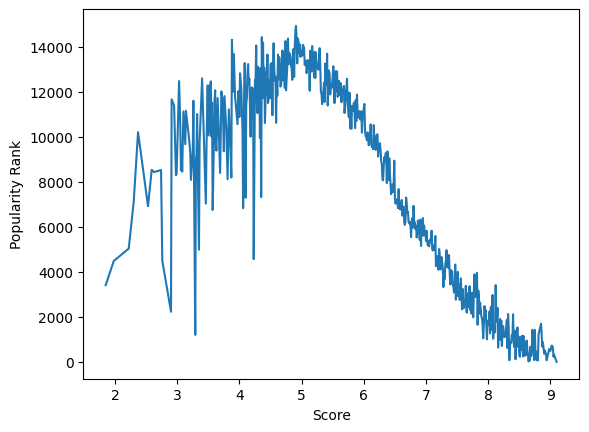

In [ ]:
#plot Episodes vs. Popularity

g = sns.lineplot(x="Score", y="Popularity", data=animes, errorbar=None)
plt.ylabel("Popularity Rank")
plt.show()

# 4. Prepare the data for Machine Learning Algorithms

#### Let's start by cleaning up the data: duplicate and missing values and how to deal with them

### 4.1- Remove duplicate rows

Check for duplicate rows, we don't have any duplicate rows

In [19]:
#  Check for duplicate rows and delete them
animes.duplicated().sum()

0

In [20]:
# Remove duplicated (just in case)
animes.drop_duplicates(inplace=True)

### 4.2-Handle the missing values
say something


In [21]:
# Find the number of missing values in each column

animes.isna().sum()

Name                0
English name    14577
Other name        128
Score            9213
Genres           4929
Synopsis            0
Type               74
Episodes          611
Aired               0
Premiered       19399
Status              0
Producers       13350
Licensors       20170
Studios         10526
Source           3689
Duration          663
Rating            669
Rank             4612
Popularity          0
Favorites           0
Scored By        9213
Members             0
Image URL           0
dtype: int64

修改此处
###

**NOTE** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [23]:
# remove unneeded columns
# do not rerun this code unless you rerun the whole program
animes.drop(labels=['Name', 'English name', 'Other name', 'Synopsis', 'Premiered','Status', 
                    'Producers', 'Licensors', 'Rank','Image URL', 'Popularity', 'Favorites', 
                    'Scored By', 'Members', 'Aired'], axis=1, inplace=True)

KeyError: "['Name', 'English name', 'Other name', 'Synopsis', 'Premiered', 'Status', 'Producers', 'Licensors', 'Rank', 'Image URL', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Aired'] not found in axis"

#### For the Score/Genres/Episode/Type attribute we will delete the instances with null famsize values

In [24]:
# Drop rows with NaN
animes.dropna(subset=["Score", "Genres", "Type", "Episodes", "Source"], inplace=True)

say something here

In [25]:
# get the number of missing values after cleaning
animes.isna().sum()

Score          0
Genres         0
Type           0
Episodes       0
Studios     1777
Source         0
Duration      10
Rating        53
dtype: int64

say something here, split genres

In [26]:
# Split "Genres"
# do not rerun this code section unless you rerun the whole program
encoded_genre = animes['Genres'].str.get_dummies(', ')
animes = pd.concat([animes, encoded_genre], axis = 1)
# drop original genre column
animes.drop(labels = ['Genres'], axis=1, inplace=True)

say something here, parse duration

In [27]:
# Parse the duration time of each anime
# Fill the NaN with -1 (temporary), means the duration is unknown
animes['Duration'] = animes['Duration'].fillna('-1')
def parse_duration(data):
        if data["Duration"].find("-1") > -1:
             data["Duration"] = pd.Timedelta(days = 0, hours = 0, minutes = 0)
             return data
        # if the data contains does not contain "per"
        if data["Duration"].find("per")== -1:
            data["Duration"] = pd.to_timedelta(data["Duration"])
            return data
        # if the data contains "per", split the data and take the first element of the array, which is the time
        if data["Duration"].find("per") > -1:
            data["Duration"] = pd.to_timedelta(data["Duration"].split(" per")[0])
            return data
    

# apply to the dataframe
animes = animes.apply(parse_duration, axis = 1)
# convert unknown duration back to NaN
animes['Duration'] = animes['Duration'].replace(pd.Timedelta(days = 0, hours = 0, minutes = 0), np.nan)
# convert timedelta to minutes (float)
animes['Duration'] = animes['Duration'].apply(lambda x: x.total_seconds() / 60)

In [28]:
animes

,Score,Type,Episodes,Studios,Source,Duration,Rating,Action,Adventure,Avant Garde,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,8.75,TV,26.0,Sunrise,Original,24.0,R - 17+ (violence & profanity),1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.38,Movie,1.0,Bones,Original,115.0,R - 17+ (violence & profanity),1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8.22,TV,26.0,Madhouse,Manga,24.0,PG-13 - Teens 13 or older,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7.25,TV,26.0,Sunrise,Original,25.0,PG-13 - Teens 13 or older,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,6.94,TV,52.0,Toei Animation,Manga,23.0,PG - Children,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24539,6.47,Special,1.0,Toei Animation,Manga,24.0,PG-13 - Teens 13 or older,1,1,0,...,0,0,0,0,0,0,0,0,0,0
24557,7.78,OVA,18.0,NaN,Game,16.0,PG-13 - Teens 13 or older,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24579,5.84,Special,1.0,A-1 Pictures,Manga,23.0,PG-13 - Teens 13 or older,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24590,5.99,ONA,1.0,"HMCH, Gravity Well",Game,3.0,PG-13 - Teens 13 or older,1,0,0,...,0,0,0,1,0,0,0,0,0,0


我做到这里了 - Jason

#### For the remaining missing values, we will fill the mean if it is a numerical value and the most frequent if it is a categorical column.

#### We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 4.3. Create a pipeline that will 

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler. Do not scale the target

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

4. Encode the categorical columns using OneHotEncoder


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy import sparse

In [30]:
# 分离数值列和分类列，假设 'Score' 是目标列
num_cols = animes.select_dtypes(include='number').columns.tolist()

# 检查 DataFrame 中每个元素是否包含字母，返回一个布尔型 DataFrame
contains_letters = animes.applymap(lambda x: isinstance(x, str) and any(c.isalpha() for c in x))

# 通过在每列中查找至少一个 True（即包含字母），来确定哪些列是分类列
cat_cols = contains_letters.any().loc[lambda x: x].index.tolist()


# 从数值列中移除目标列 'Score'
if 'Score' in num_cols:
    num_cols.remove('Score')
print(cat_cols)
# 创建针对数值列和分类列的管道
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# 使用ColumnTransformer来应用这些管道
preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    remainder='passthrough'  # 保留其他未指定的列
)

['Type', 'Studios', 'Source', 'Rating']


C:\Users\123456\AppData\Local\Temp\ipykernel_25900\265602912.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_letters = animes.applymap(lambda x: isinstance(x, str) and any(c.isalpha() for c in x))


#### Display your pipeline

In [31]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Episodes', 'Duration', 'Action', 'Adventure',
                                  'Avant Garde', 'Award Winning', 'Boys Love',
                                  'Comedy', 'Drama', 'Ecchi', 'Erotica',
                                  'Fantasy', 'Girls Love', 'Gourmet', 'Hentai',
                                  'Horror', 'Mystery', 'Romance', 'Sci-Fi',
                                  'Slice of Life', 'Sports', 'Supernatural',
                                  'Suspense']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Type', 'Studios', 'Source', 'Rating'])])

In [32]:
# 对 'animes' 数据集应用预处理
animes_prepared = preprocessing.fit_transform(animes)

# 如果结果是稀疏矩阵，则将其转换为密集矩阵
if sparse.issparse(animes_prepared):
    animes_prepared = animes_prepared.toarray()

# 获取转换后的特征名称
feature_names = preprocessing.get_feature_names_out()

# 使用处理后的数据和特征名称创建新的DataFrame
animes_prepared_df = pd.DataFrame(animes_prepared, columns=feature_names)

# 查看预处理后的DataFrame
print(animes_prepared_df)

       num__Episodes  num__Duration  num__Action  num__Adventure  \
0           0.335260      -0.088942     1.551245       -0.474116   
1          -0.245533       3.509049     1.551245       -0.474116   
2           0.335260      -0.088942     1.551245        2.109188   
3           0.335260      -0.049404     1.551245       -0.474116   
4           0.939284      -0.128480    -0.644643        2.109188   
...              ...            ...          ...             ...   
12309      -0.245533      -0.088942     1.551245        2.109188   
12310       0.149406      -0.405249    -0.644643       -0.474116   
12311      -0.245533      -0.128480     1.551245       -0.474116   
12312      -0.245533      -0.919247     1.551245       -0.474116   
12313      -0.245533      -0.088942     1.551245        2.109188   

       num__Avant Garde  num__Award Winning  num__Boys Love  num__Comedy  \
0              -0.18953            7.704722       -0.110295    -0.752773   
1              -0.18953        

# 5. Select a model and train it

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [68]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) by dropping the 'remainder__Score' column from the DataFrame
X = animes_prepared_df.drop(["remainder__Score"], axis=1)
# Define the target variable (y) as the 'remainder__G3' column from the DataFram
y = animes_prepared_df["remainder__Score"]

# Split the dataset into training and test sets
# 'test_size=0.2' means 20% of the data is used for the test set, and 80% for the training set
# 'random_state=42' ensures reproducibility of the results by setting a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9851, 1299) (9851,) (2463, 1299) (2463,)


### 5.2 Train a Linear Regression model 

In [56]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr_model = LinearRegression()

# Fit the model with training data
lr_model.fit(X_train, y_train)

LinearRegression()

### Test your model on the test set, and report on the Mean Squared Error

In [52]:
# Predict the outcome of test data
lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
# Calculate the mean squared error between the actual outcomes and the predictions
lr_mse=mse(y_test, lr_y_predict)
lr_mse

7.553458168258314e+20

### 5.3 Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [78]:
from sklearn.model_selection import cross_val_score, KFold

# Perform 5-fold cross-validation and compute the negative MSE for each fold
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-7.50737444e+19, -4.94730861e+18, -3.72079366e+20, -5.69117054e+18,
       -1.08621528e+20])

### 5.4 Calculate the mean and standard deviation of the cross-validation scores to get an overall assessment of the model's performance:

In [58]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 1.1328262345439866e+20


**NOTE** cross_val_score in scikit-learn does allow you to use mean squared error (MSE) as a scoring metric. 

However, you should use 'neg_mean_squared_error' as the scoring parameter when you call cross_val_score. 

The reason for this naming convention is that cross_val_score follows a convention where greater values are better for scoring, while MSE is typically minimized (you want it to be as small as possible). 

To reconcile this, you use the negative MSE, which turns it into a maximizing score (higher is better).

Here's how you can use cross_val_score with negative mean squared error:

scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))



### 5.5 Train a Linear Regression model using Ridge and Lasso regularization with alpha=1

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Instantiate the Ridge Regression model with alpha set to 1
RidgeRegression = Ridge(alpha=1)
# Fit the Ridge model to the training data
ridge_model = RidgeRegression.fit(X_train, y_train)

# Instantiate the Lasso Regression model with alpha set to 1
LassoRegression = Lasso(alpha=1)
# Fit the Lasso model to the training data
lasso_model = LassoRegression.fit(X_train, y_train)


### Test your models on the test dataset and report on the MSE

In [76]:
# Predict the outcomes using the Ridge and Lasso regression models
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for both models' predictions
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse = mse(y_test, Lasso_y_predict)


print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 0.41657489294759764
Lasso Regression MSE: 0.8361950745360744


Compare the results from all the models

In [66]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')


Linear Regression MSE: 7.553458168258314e+20
Cross-Validation Mean Score: 1.1328262345439866e+20
Ridge Regression MSE: 0.41657489294759764
Lasso Regression MSE: 0.8361950745360744


### 5.6 Plot the prediction vs. actual for the best performing model

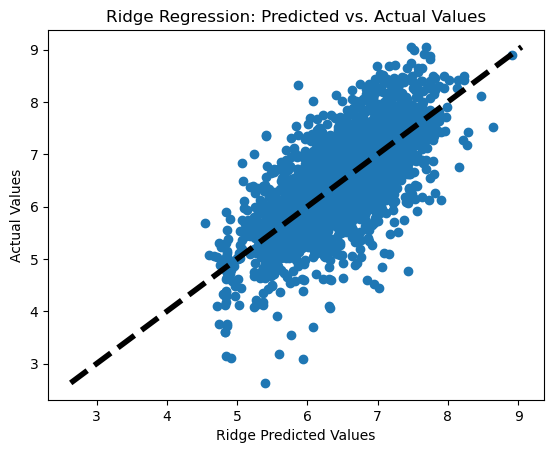

In [75]:
import matplotlib.pyplot as plt

# Assuming 'ridge_model' is your trained Ridge Regression model
ridge_y_predict = ridge_model.predict(X_test)  # Predict using the test set features

# Plot the predicted values against the actual values
plt.scatter(ridge_y_predict, y_test)  # Plot Ridge Regression predictions on the x-axis and actual target values on the y-axis
plt.xlabel("Ridge Predicted Values")  # Label for the x-axis
plt.ylabel("Actual Values")  # Label for the y-axis
plt.title("Ridge Regression: Predicted vs. Actual Values")  # Title of the plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw a reference line of y=x in black dashed line
plt.show()  # Display the plot



# Markdown for Jupyter notebooks cheatsheet

Source: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

Here's how to format Markdown cells in Jupyter notebooks:

Headings

Use the number sign (#) followed by a blank space for notebook titles and section headings:
# for titles
## for major headings
### for subheadings
#### for 4th level subheadings

### Emphasis

Use the following code to emphasize text:

Bold text: __string__ or **string**

Italic text: _string_ or *string*


### Bullets

To create a circular bullet point, use one of the following methods. Each bullet point must be on its own line.

A hyphen (-) followed by one or two spaces, for example: - Bulleted item

A space, a hyphen (-) and a space, for example: - Bulleted item

An asterisk (*) followed by one or two spaces, for example: * Bulleted item

## Numbered lists

To create a numbered list, enter 1. followed by a space, for example:
1. Numbered item
1. Numbered item

For simplicity, you use 1. before each entry. The list will be numbered correctly when you run the cell.

